# MATH 405/607 

# Method of Steepest Descent 
# (Also known as Gradient Descent)

* Optimization problems & Root finding
* Gradient Descent Scheme
* Error Analysis
* Global Convergence

### Literature 

* [Boyd and Vandenberghe, Convex Optimization, Chapter 9](https://web.stanford.edu/~boyd/cvxbook/)

In [3]:
include("math405.jl")

## Optimization Problems

**Motivation:** Finding the minimum ("optimum") points of a function numerically. 

**Fundamental Principle:** By following the opposite direction of its gradient in each iteration.

In other words, step towards where the function decreases the fastest. ("Steepest" descent)

Simple example:

Finding the minimum of
$$f(x,y) = x^2 + y^2 $$

![GradientDescenturl](https://blog.paperspace.com/content/images/2018/05/68747470733a2f2f707669676965722e6769746875622e696f2f6d656469612f696d672f70617274312f6772616469656e745f64657363656e742e676966.gif)

### Formulation
Given a function $f \in \mathbb{R}^M$, which we need to find its minimum.

Starting at some initial guess: $U_0 = \begin{pmatrix} 
    x_{1, 0} \\ x_{2, 0} \\ \vdots \\ x_{M, 0}
    \end{pmatrix}$

The gradient of the function at this point is given by 
$$\nabla f(U_n)= 
    \begin{pmatrix} 
    \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_M}
    \end{pmatrix} \, \Bigg|_{\,U_n}$$

Then, we define the Gradient Descent Scheme:

$$ U_{n+1} = U_n + h\big( -\nabla f(U_n)\big)$$

Where $h$ is the (non-constant) step size, that each step $k$ we choose $h_k$ such that $h = f\big(x_k - h_k * \nabla f(x_k)\big) < f(x_k)$

This damps any oscillations from propagating larger and larger.

With the exit condition being $\lVert \nabla f(U_k) \rVert \leq \epsilon$ for some small tolerance $\epsilon$

### Advantage of the Gradient Descent Scheme:

* Resilient to not so "nice" functions (Whose higher order derivatives does not exist or have unwanted zeros)
* Moderate computation complexity (Requires only first order derivative)
* Consistent convergence rate & Globally convergent


### Comparison to Newton's Method in Optimization
##### The Newton's Method of Optimization is defined as 
$$U_{n+1} = U_n - h\frac{f'(U_n)}{f''(U_n)}$$
(Finding the root of the derivative instead of $f^0(x)$)

##### Where the 1-D Gradient Descent Method is 
$$ U_{n+1} = U_n - hf'(U_n)$$

In higher order:
$$ U_{n+1} = U_n - h\nabla f(U_n)$$
Newton's Method requires $f''(U_n)$ to exist and is well-behaved (no nearby zeros).
It also requires computing the Hessian matrix & its invert at higher orders.

(Lot's of differentiation!)

While Gradient Descent only requires computation of $f'(U_n)$.


### Example:
Finding the minimum of $f(x, y) = cos(x) + sin(y)$ within $x \in [-2, 4]$ and $y \in [0, 6]$

In [1]:
f(x) = cos(x[1]) + sin(x[2]) #For working with the ForwardDiff library
g(x,y) = cos(x) + sin(y) #For plotting convenience

gradf(x) = ForwardDiff.gradient(f, x)
hessf(x) = ForwardDiff.hessian(f, x)

h0 = 0.3 # Initial choice of step size h
tolerance = 1e-4;

##### Newton's Method:

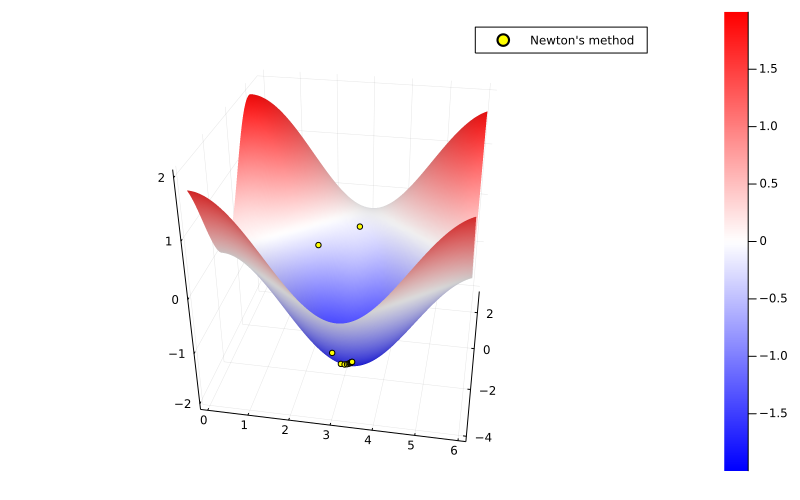

In [4]:
using Plots;
guessX = 2
guessY = 0.1
h = h0
x = zeros(2)
x[1] = guessX
x[2] = guessY;
iterx = [x[1]] ;itery = [x[2]]; iterf = [f(x)]
x0=range(0,stop=6,length=200)
y0=range(-4,stop=2,length=200)
# p = plot(f, 0.0, 2*pi, lw=3, grid=:xy, size=(600,300), label = "f(x)")
p = plot(x0,y0,g,st=:surface,camera=(10,30), c=:bwr, size=(800,500))

newx = zeros(2)

while(true)
    old_x = x[1]
    old_y = x[2]
    newx[1], newx[2] = [x[1], x[2]] - h * inv(hessf(x)) * gradf(x)
#--------See if we need to adjust h as we approaches the optimum--------#
    while f(newx) >= f(x) #backtracking line search
        h = 2h/3
        newx[1], newx[2] = [x[1], x[2]] - h * inv(hessf(x)) * gradf(x)
    end

#---------------------------Advancing----------------------#
    x[1], x[2] = newx[1], newx[2] ; push!(iterx, x[1]) ; push!(itery, x[2]) ; push!(iterf, f(x))

#---------------------------Check convergence----------------------#
    if abs((old_x - x[1])^2 + (old_y - x[2])^2) <= tolerance
        break
    end
end

scatter!(iterx, itery, iterf, ms=3, color=:yellow, label = "Newton's method")

p

##### Gradient Descent:

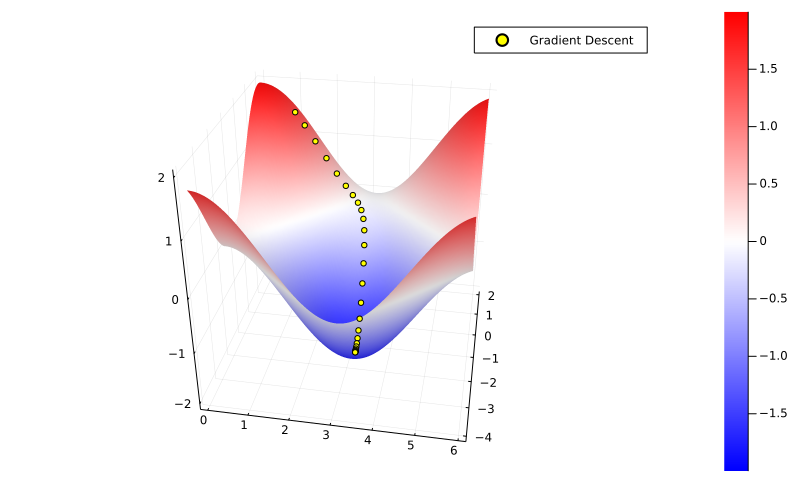

In [5]:
guessX = 1
guessY = 1.5
h = h0
x = zeros(2)
x[1] = guessX
x[2] = guessY;
iterx = [x[1]] ;itery = [x[2]]; iterf = [f(x)]
x0=range(0,stop=6,length=200)
y0=range(-4,stop=2,length=200)
# p = plot(f, 0.0, 2*pi, lw=3, grid=:xy, size=(600,300), label = "f(x)")
p = plot(x0,y0,g,st=:surface,camera=(10,30), c=:bwr, size=(800,500))
newx = zeros(2)

while(true)
    old_x = x[1]
    old_y = x[2]
    
#--------See if we need to adjust h as we approaches the optimum--------#
    newx[1], newx[2] = [x[1], x[2]] - h * gradf(x)
    while f(newx) >= f(x) #backtracking line search
        h = 2h/3
        newx[1], newx[2] = [x[1], x[2]] - h * gradf(x)
    end
#---------------------------Advancing----------------------#
    x[1], x[2] = newx[1], newx[2] ; push!(iterx, x[1]) ; push!(itery, x[2]) ; push!(iterf, f(x))
    
#---------------------------Check convergence----------------------#
    if abs((old_x - x[1])^2 + (old_y - x[2])^2) <= tolerance
        break
    end
    
end

scatter!(iterx, itery, iterf, ms=3, color=:yellow, label = "Gradient Descent")

p

### Computational Cost:
### L2-regularized Least Sqaures:
For the L2-regularized least squares, running t iterations of gradient descent will take O(ndt), n examples and d features.
The closed form solution: $w = (X^TX+\lambda I)^{-1}(X^Ty)$, costs $O(nd^2 + d^3).

So gradient descent is only faster if we only have to do $t <$ max$\{d, d^2/n\}$ iterations.

### Logisitc Regression:


Test Cell adam is gonna put notes in

https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf 477-498 are good  
https://web.stanford.edu/~boyd/cvxbook/bv_cvxslides.pdf  
https://www.osti.gov/servlets/purl/983240/  
https://www.cs.ubc.ca/~schmidtm/Courses/540-W18/L4.pdf  
https://www.math.usm.edu/lambers/mat419/lecture10.pdf  
https://people.seas.harvard.edu/~yaron/AM221-S16/lecture_notes/AM221_lecture10.pdf  
https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization  
https://en.wikipedia.org/wiki/Hessian_matrix  
https://en.wikipedia.org/wiki/Convex_function  
https://www.cs.ubc.ca/~schmidtm/Courses/Notes/norms.pdf  
  


General steepest descent methods:
    move along the direction that leads to the steepest descent with respect to a certain parameter

starting at some intial point $x_0$, we iterate $x_k$ by stepping: 
$$
x_{k+1} = x_k + \alpha_kd_k
$$

where $d_k$ is the direction of steepest decrease in the function $f(x)$ and:

$$
\alpha_k = \arg_{\alpha} \min f(x_k + \alpha d_k)
$$

ex for finding the minima of a function $h(x,y)$:
$$
f(x,y) = h(x,y)
$$
ex for finding the solution to an equation $Ax = b$:
$$
f(x_k) = ||Ax_k-b||
$$
ex for 

**Gradient descent**:https://en.wikipedia.org/wiki/Gradient_descent  
    descend along the negative gradient of a function to find a local minima.  
        requires the function to be differentiable.  
    inverse is gradient ascent (finding maxima)
   
**Coordinate descent**:https://en.wikipedia.org/wiki/Coordinate_descent  
    iteratively move along coordinate directions to find a local minima of a function  
        does not require differentiability (big plus)  

**Conjugate gradient descent**:https://en.wikipedia.org/wiki/Conjugate_gradient_method  


**Adaptive coordinate descent**:https://en.wikipedia.org/wiki/Adaptive_coordinate_descent  

# Descent Methods #
## Motivation: Unconstrained minimization problems ##
Solving:
$$
\min f(x)
$$
Where $f: \Re^n \rightarrow \Re$. and f is continuously differentiable and has a minimum at the point $x_a$. To make our analysis easier (and ensure there is a minima), for this presentation we will also assume $f$ is **convex**.  
### Convex functions ###
A function $f$ is convex on an interval $x \in [x_a,x_b]$ if:
$$
f(tx_1+(t-1)x_2) \leq tf(x_1) + (1-t)f(x_2)
$$
for $t \in [0,1]$ for any two points on the interval $x_1 \in [x_a,x_b], x_2 \in [x_a,x_b], x_1 < x_2$ . Graphically this is equivalent to:
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/ConvexFunction.svg/1024px-ConvexFunction.svg.png" width="600"/>
</div>
<em>Source: Wikipedia "Convex Functions"</em>
for a function to be globally convex it must be true for any $x_1, x_2$. 
  
If a function is convex then the global minimum will be at the point $x_{min}$ such that:
$$
\nabla f(x_{min}) = 0
$$

an example of an important/useful function that are convex are norms.

## Strong Convexity ##

If a function is said to be strongly convex it satisfies:
$$
\nabla^2f(x)\succeq mI
$$
$m \in \Re$. Which means the matrix $A = \nabla^2f(x) - mI$ is positive semi-definite ($xAx^T \geq 0$). In 1 dimension this is equivalent to saying $f''(x) \geq m$.
##  Solving minimization problems: An intuitive approach ##
Lets say we have some function $f: \Re^2 \rightarrow \Re$ that we want to find the minimum of numerically, and we can differentiate the function at any point.
  
An intuitive pseudocode algorithm we could use would be as follows:  

1. Starting at $x_0$, find the direction $\Delta x$ which we can "move" from $x_0$ to decrease $f$ (descending)
2. "Move" in that direction for "a while"
3. Repeat steps 1 and 2 until we reach the minima

This algorithm describes a generic **descent method**.  

The direction $\Delta x$ defines a line in $\Re^2$ that we will move along.
<div>
<img src="steepestDescentSearchSlice.PNG" width="400"/>
</div>
The difference between descent methods often involve stopping at different points along the ray defined by the steepest descent line. Given a stopping condition, Step 2 in our algorithm becomes a **searching problem** as we will want to find the point at which we'd like stop along $\Delta x$ to find the next direction of steepest descent.
## Stopping conditions for Descent Method iteration steps ##
Two commonly used searches are the **Linear search** and **Backtracking search**
### Linear Search ###
Evaluate:
$$
\arg \min_t f(x_0 + t\Delta x)
$$
Or in $\Re^2$, find the spot on the line defined by $x + t\Delta x$ does the function reach a minima? This search method is **exact**. However, numerically this search method can be computationally depending on $f(x)$.

### Backtracking search ###
**Big idea:** Approximately minimize $f(x)$ along $\Delta x$
Start at $t_0 = 1$ and iterate $t_{n+1} = \beta t_n$ until:
$$
f(x_0 +t_n\Delta x) \leq f(x_0) + \alpha \nabla f(x_0)^T \Delta x
$$
Where $\alpha \in [0,0.5]$ and $\beta \in [0,1]$. This method is **inexact** but is useful for computation when it is costly to compute $f(x)$. Iterations of the descent method using backtracking converges on the minimum point slower than if using an exact search (fewer steps) but may execute faster if $f(x)$ is a costly operation.

<div>
<img src="backtrack.PNG" width="500"/>
</div>

The reason this converges over many iterations to the minima hinges on the fact that $\nabla f$ is monotonically approaching zero as we approach the minima since the function is convex. And that each step we take we get a little bit closer to the minima. Another way to see this is that there is a chord formed by the line $f(x_0)+\alpha t\nabla f(x_0)^T \Delta x$ defines the region where the backtracking search can stop. Since $f$ is convex this chord is higher than all the other points between the points where the line intersects the function. This means that the search will only end when it has found a point that is lower than the initial point.

## Example Steepest descent methods ##
<div>
<img src="steepestDescentSearch.PNG" width="700"/>
</div>

## How do we determine the direction of steepest descent? ##
The easiest option would be to move in the direction of the **negative gradient** of $f$ (the function we are minimizing):  
$$
\Delta x = - \nabla f(x)
$$

This would ensure that at each iteration we are always minimizing the distance between the minimized point $||f(x_{min}) - f(x_n)||_2$ at the maximal rate.
<div>
<img src="steepestDescentSearchShowingGrad.png" width="500"/>
</div>
The rays are always rotated $\frac{\pi}{2}$ radians from the level curves. This corresponds to following the negative gradient.

## Are there other directions to descend? ##
Yes! It depends on the norm we are using to minimize...
1. Euclidan norm $||x||_2: -\nabla f(x)$
2. $\textit{l}_1$-norm: $-(\partial f(x)/\partial(x_i))e_i$ where $|(\partial f(x)/\partial(x_i))| = ||\nabla f(x)||_\infty$
3. $\textit{l}_{\infty}$-norm: $(-\partial f(x)/\partial(x_i))e_i$ where $x_i = ||f(x)_i||_\infty$

## Is this the best we can do? ##
So far we have been only using 1st derivative information. What if we used higher order information as well?
#### Newton's method for optimization ####
Instead of using 1st derivative information to decide our step direction we can descend using the direction:
$$
\Delta x = -\frac{\nabla f(x)}{\nabla^2 f(x)}
$$
This gives the steepest descent direction to minimize the **Hessian norm** which is the matrix norm of the hessian matrix (contains all the 2nd order partials).  
We will show that this converges faster in a moment. But once again, if the Hessian matrix cannot be computed or is costly to compute this method may execute slower.

<div>
<img src="newton_vs_grad.png" width="400"/>
</div>
Red shows Newton Step, green shows gradient descent (both with exact searches)  

### Issues with Newton's method for optimization ###
Along with the execution cost of the second derivatives required to compute the directions for this method, there are other drawbacks which can make Newton Step unusable:
1. The Hessian matrix must be invertible (Used to calculate the descent direction)
2. Can converge to a saddle point in $\Re^n, n \geq 2$
3. Like the Newton method for root finding, it may not converge and instead oscillate between points

## Convergence Analysis for Newton's Method for optimization ##


## Convergence Analysis for Gradient Descent ##

**Implications of strong convexity**

Assume f is strongly convex on S, so that there exists $m,M$ such that $mI \leq \nabla^2 f(x) \leq MI$ for all $x \in S$.

This also means that for $x,y \in S$, we have:

$f(y) = f(x) + \nabla f(x)^T(y-x) + \frac{1}2 (y-x)^T \nabla^2 f(z) (y-x)$ for some z on the line segment between x and y.

Plugging in the first inequality, we get for all $x,y \in S$:

$f(y) \geq f(x) + \nabla f(x)^T(y-x) + \frac{m}2 ||y-x||_2^2$ (1)
and similarly
$f(y) \leq f(x) + \nabla f(x)^T(y-x) + \frac{M}2 ||y-x||_2^2$ (2)

Let $p^*$ be the minimum value of $f$, and we will show that $f-p^*$ is bounded. 

Setting the gradient of y to 0 (simple, omitted, calculus stuff), we can minimize the right hand side of (1) with $\widetilde(y) = x - \frac{1}m \nabla f(x)$, such that:

$f(y) \geq f(x) + \nabla f(x)^T(y-x) + \frac{m}2 ||y-x||_2^2$

$\ \ \ \ \ \ \ \geq f(x) + \nabla f(x)^T(\widetilde(y)-x) + \frac{m}2 ||\widetilde(y)-x||_2^2$ 

$\ \ \ \ \ \ \ \geq f(x) - \frac{1}{2m} ||\nabla f(x)||_2^2$ (just trust)

This this holds for all $y \in S$, we have:

$\frac{1}{2m} ||\nabla f(x)||_2^2 \geq f(x) - p^*$ (3)

Now, back to the gradient descent:
Define $g: \Re \to \Re$, $g(t) = f(x - t\nabla f(x))$, a function of the step length t in the negative gradient direction. Plugging in $y = x - t\nabla f(x)$ above gets us a quadratic bound on g:

$f(x - t\nabla f(x)) = g(t) \leq f(x) + t||\nabla f(x)||_2^2 + \frac{Mt^2}2 ||\nabla f(x)||_2^2$ (4)

**Analysis for linear search**

Let $x^+ = x - t\nabla f(x)$. Minimize both sides of the previous inequality:

Let $t_{actual}$ be the step length that minimizes $g(t)$. and the right hand side be minimized by $t=1/M$, with a min value of $f(x) - \frac{1}{2M} ||\nabla f(x)||_2^2$. So, we get:

$f(x^+) = g(t_{actual}) \leq f(x) - \frac{1}{2M} ||\nabla f(x)||_2^2$

Let $p^*$ be the minimum value of $f$, and subtract it from both sides.

$f(x^+) - p^* \leq f(x) - p^* - \frac{1}{2M} ||\nabla f(x)||_2^2$

From (3), $||\nabla f(x)||_2^2 \geq 2m(f(x) - p^*)$, we get:

$f(x^+) - p^* \leq (1- \frac{m}{M})(f(x) - p^*)$

Let $c = 1- \frac{m}{M} \leq 1$, and apply the inequality above recursively, we get that:

$f(x^{(k)}) - p^* \leq c^{(k)}(f(x^{(0)}) - p^*)$

Since as $k \to 0$, $c^{(k)}(f(x^{(0)}) - p^*) \to 0$, we see that $f(x^{(k)})$ converges to $p^*$, the minimum value of $f$. 

The $c^k$ term also indicates that the rate of convergence is at least as fast as a geometric series.

In particular, we will have $f(x^{(k)}) - p^* < \epsilon$ after at most $\frac{log(\frac{(f(x^{(0)}) - p^*)}{\epsilon})}{log(\frac{1}{c})}$

**Analysis for backtracking line search**

We will show that the exit condition:

$g(t) = f(x - t\nabla f(x)) \leq f(x) - \alpha t ||\nabla f(x)||_2^2$,

is satisfied when $0 < t < \frac{1}{M}$ (Note: this implies $-t + \frac{Mt^2}2 \leq -\frac{t}2$)

From (4):

$g(t) \leq f(x) + t||\nabla f(x)||_2^2 + \frac{Mt^2}2 ||\nabla f(x)||_2^2$

$\ \ \ \ \ \ \leq f(x) - \frac{t}{2}||\nabla f(x)||_2^2$

$\ \ \ \ \ \ \leq f(x) - \alpha t||\nabla f(x)||_2^2$, since $\alpha < \frac{1}2$

Therefore, the backtracking line search terminates either with $t = 1$ or with a value $t \geq \frac{\beta}M$. This provides a lower bound on the decrease in the objective function